> **Dataset:** Breast Cancer Dataset by UCI Machine Learning Repository (Asuncion and Newman, 2007)
\
*The Class Samples are either Benign (value = 2) or Malignant (value = 4)*

Evaluation Metrics:
Accuracy: 48.354792560801144 %
Precision: 33.60655737704918 %
Recall (Sensitivity): 51.037344398340245 %
Specificity: 46.943231441048034 %
F1 Score: 40.527182866556835 %
F-beta Score (beta=0.5): 36.070381231671554 %

Confusion Matrix:
                  Predicted Benign  Predicted Malignant
Actual Benign                  215                  243
Actual Malignant               118                  123


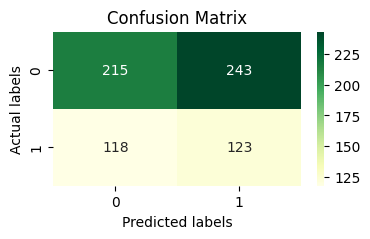

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load dataset
cell_df = pd.read_csv('/cell_samples.csv')

# Create a random array of 699 elements with values 2 and 4
np.random.seed(42)  # for reproducibility
y_pred = np.random.choice([2, 4], size=699)

# Confusion matrix
y_true = cell_df['Class']
conf_matrix = confusion_matrix(y_true, y_pred)

# Extract TP, TN, FP, FN from confusion matrix
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

# Calculate evaluation metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
f1 = 2 * (precision * recall) / (precision + recall)

# Calculate F-beta scores with beta=0.5
beta_05 = 0.5
fbeta_05 = (1 + beta_05**2) * (precision * recall) / (beta_05**2 * precision + recall)

# Calculate all measures in percentages
accuracy_percent = accuracy * 100
precision_percent = precision * 100
recall_percent = recall * 100
specificity_percent = specificity * 100
f1_percent = f1 * 100
fbeta_05_percent = fbeta_05 * 100

# Display evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy_percent, "%")
print("Precision:", precision_percent, "%")
print("Recall (Sensitivity):", recall_percent, "%")
print("Specificity:", specificity_percent, "%")
print("F1 Score:", f1_percent, "%")
print("F-beta Score (beta=0.5):", fbeta_05_percent, "%")

# Plot the confusion matrix
conf_df = pd.DataFrame(conf_matrix, columns=['Predicted Benign', 'Predicted Malignant'],
                       index=['Actual Benign', 'Actual Malignant'])
print("\nConfusion Matrix:")
print(conf_df)

# Plotting the confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGn")
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()